In [14]:
import numpy as np

# parameter(have to set by yourself)
grid = np.array([
    [4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4],
])

# start, finish 위치 랜덤 생성 + 블럭위치에는 생성 안되게 + start, finish가 같지 않게
start = None
finish = None

while start is None or grid[start] == -1 or finish is None or grid[finish] == -1 or finish == start:
    start = (np.random.randint(9), np.random.randint(7))
    finish = (np.random.randint(9), np.random.randint(7))

dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

to_right = (0,1)


def blue(current, finish, grid, path):
    candidate = []

    current = (current[0], current[1]-1)
    candidate.append(current)

    return candidate



def purple(current, finish, grid, path):
    temp_candidate = []
    distances = []

    # start가 purple grid에 있을 때, 일단 모든 candidate 고려
    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        # 그리드 범위 안에 있고, Block이 아니고, 이미 간 길이 아닌 경우만
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                temp_candidate.append((nx, ny))
                distances.append(abs(nx - finish[0]) + abs(ny - finish[1]))

    # finish와 거리가 가장 가까운 candidate만 남기기 다시말해, finish와 가까운 좌표만 남김
    if len(temp_candidate) == 0:
        candidate = []
    else:
        min_distance = min(distances)
        candidate = [c for i, c in enumerate(temp_candidate) if distances[i] == min_distance]

    return candidate



def green(current, finish, grid, path):
    temp_candidate = []
    distances = []

    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        # 그리드 범위 안에 있고, Block이 아니고, 이미 간 길이 아닌 경우만
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                temp_candidate.append((nx, ny))
                distances.append(abs(nx - finish[0])+abs(ny - finish[1]))
                
    # finish와 거리가 가장 가까운 candidate만 남기기 다시말해, finish와 가까운 좌표만 남김
    if len(temp_candidate) == 0:
        candidate = []
    else:
        min_distance = min(distances)
        candidate = [c for i, c in enumerate(temp_candidate) if distances[i] == min_distance]

    return candidate



# 무조건 갈래길 다 candidate
def orange(current, finish, grid, path):
    candidate = []

    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                candidate.append((nx, ny))
    
    return candidate




# 1. 밟았던건 안밟게. path 리스트 활용
# 2. 추후 if current == 왼쪽 가장자리 쪽 or 교차로 등이면 소요시간 변화 등 속성
# 3. 
def move(current, finish, grid, path, route):
    print('current : ', current)

    path.append(current)
    print('path : ', path)

    color = grid[current[0], current[1]]
    print('color : ', color)
    if color == 1:
        candidate = blue(current, finish, grid, path)
    elif color == 2:
        candidate = purple(current, finish, grid, path)
    elif color == 3:
        candidate = green(current, finish, grid, path)
    elif color == 4:
        candidate = orange(current, finish, grid, path)
    else:
        print('Invalid color. terminating.')
        return
    print('candidate : ', candidate)

    # 갈곳 없으면 종료
    if len(candidate) == 0 :
        print('This path is dead end.', 'path : ', path)
        return

    # candidate 방문
    for next_move in candidate:
        if next_move == finish:
            # If next_move is finish, add completed path to route
            print('got finish, completed path : ', path + [next_move]) 
            route.append(path + [next_move])
        else:
            # Continue recursively visiting candidate
            new_path = path.copy()
            move(next_move, finish, grid, new_path, route)

    return

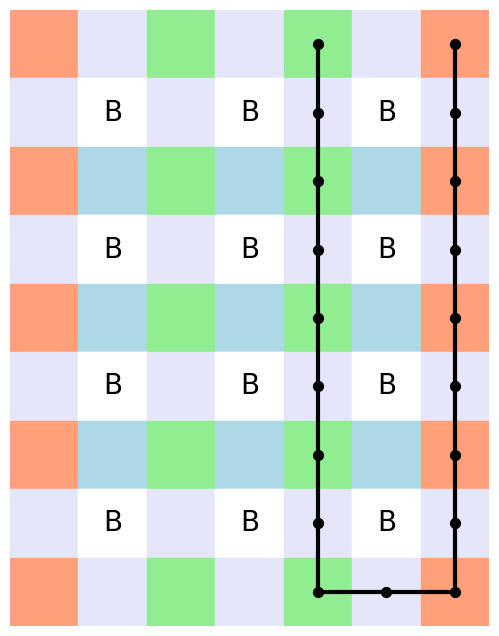

In [15]:
import matplotlib.pyplot as plt

grid = np.array([
    [4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4],
])

# Define the colors for each value
colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

# Define the path
path = [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (7, 4), (6, 4), (5, 4), (4, 
4), (3, 4), (2, 4), (1, 4), (0, 4)]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 8))

# Iterate through the grid and plot each cell with the appropriate color
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))  # flip the order of the coordinates
        
        # Add text 'B' on a white background if the coordinate value is -1
        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)
    
    # Add black dots at each coordinate in the path
    for coord in path:
        if coord[0] == i:
            ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)  # flip the order of the coordinates
    
# Connect the dots in the path with a line
x, y = zip(*path)
ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')  # flip the order of the coordinates

# Set the limits and aspect ratio
ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Show the plot
plt.show()


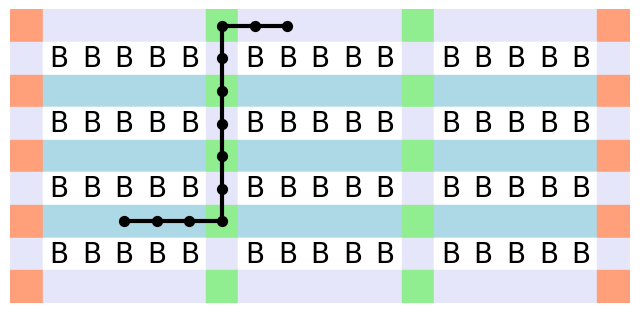

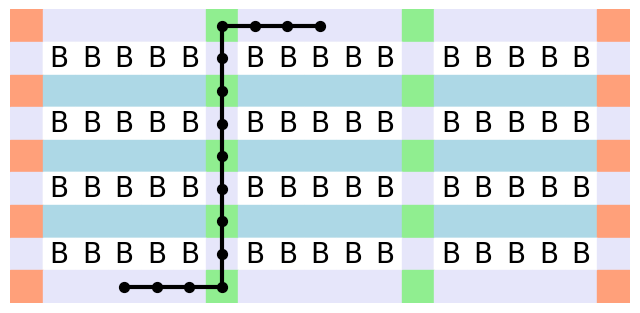

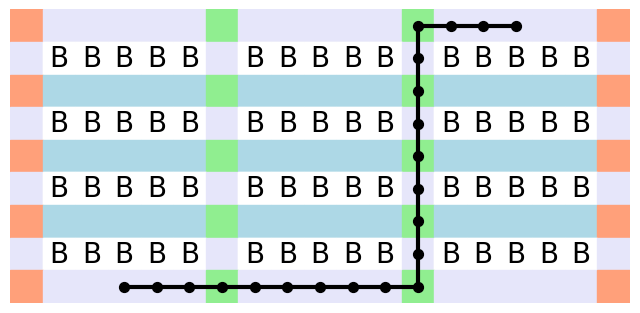

In [16]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2 ,3, 2, 2, 2, 2, 2, 4]])

colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

route = [[(0, 8), (0, 7), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3)],
         [(0, 9), (0, 8), (0, 7), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (8, 3)],
         [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (7, 12), (6, 12), (5, 12), (4, 12), (3, 12), (2, 12), (1, 12), (0, 12), (0, 13), (0, 14), (0, 15)]]

for path in route:
    fig, ax = plt.subplots(figsize=(8, 8))

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            value = grid[i][j]
            color = colors.get(value, 'white')
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

            if value == -1:
                ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
                ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

        for coord in path:
            if coord[0] == i:
                ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)

    x, y = zip(*path)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    plt.show()


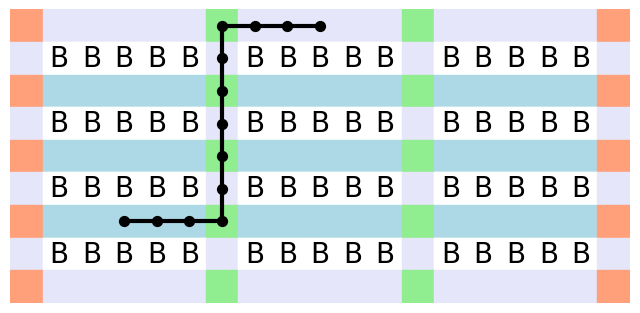

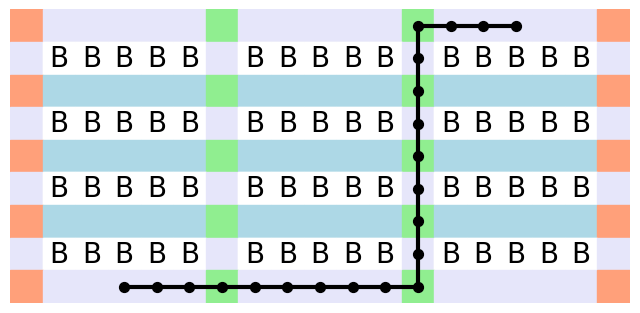

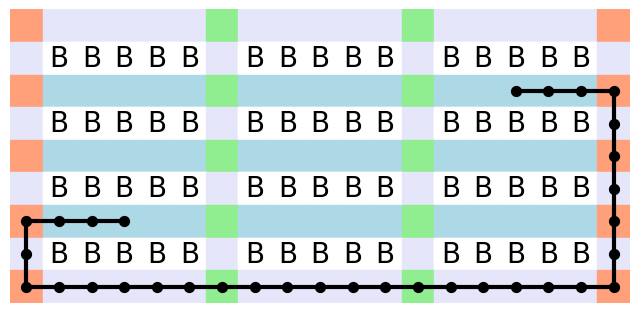

In [17]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2 ,3, 2, 2, 2, 2, 2, 4]])

colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

route = [[(0, 9), (0, 8), (0, 7), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3)],
         [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (7, 12), (6, 12), (5, 12), (4, 12), (3, 12), (2, 12), (1, 12), (0, 12), (0, 13), (0, 14), (0, 15)],
         [(6, 3), (6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (7, 18), (6, 18), (5, 18), (4, 18), (3, 18), (2, 18), (2, 17), (2, 16), (2, 15)]]

for path in route:
    fig, ax = plt.subplots(figsize=(8, 8))

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            value = grid[i][j]
            color = colors.get(value, 'white')
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

            if value == -1:
                ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
                ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

        for coord in path:
            if coord[0] == i:
                ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)

    x, y = zip(*path)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    plt.show()


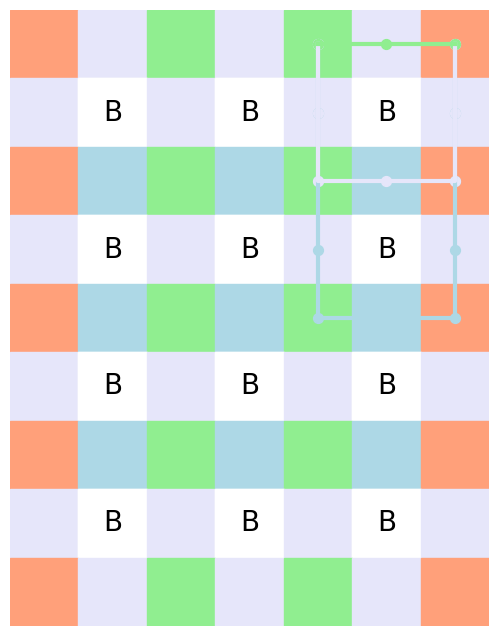

In [18]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 2, 3, 2, 3, 2, 4]])

colors = {1: 'lightblue',
          2: 'lavender',
          3: 'lightgreen',
          4: 'lightsalmon'}

routes = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (0, 5), (0, 4)]]

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

for idx, route in enumerate(routes):
    x, y = zip(*route)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color=list(colors.values())[idx])

    for coord in route:
        ax.scatter(coord[1]+0.5, grid.shape[0]-1-coord[0]+0.5, color=list(colors.values())[idx], s=50)

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()


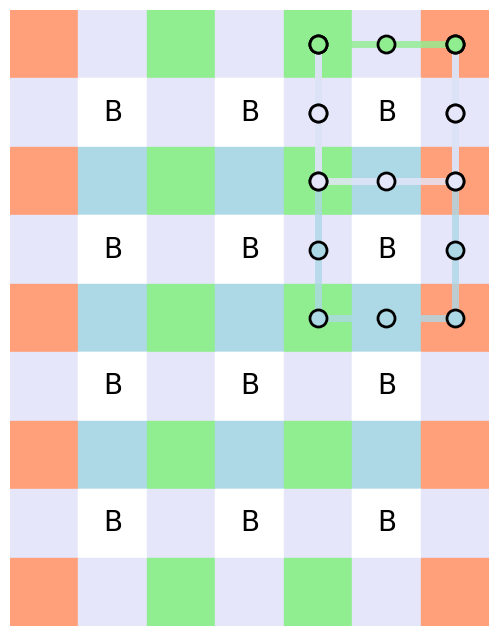

In [19]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 2, 3, 2, 3, 2, 4]])

colors = {1: 'lightblue',
          2: 'lavender',
          3: 'lightgreen',
          4: 'lightsalmon'}

routes = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (0, 5), (0, 4)]]

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

for idx, route in enumerate(routes):
    x, y = zip(*route)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=5, color=list(colors.values())[idx], alpha=0.8, zorder=2)

    for coord in route:
        ax.scatter(coord[1]+0.5, grid.shape[0]-1-coord[0]+0.5, color=list(colors.values())[idx], s=150, edgecolors='black', linewidths=2, zorder=3)

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()


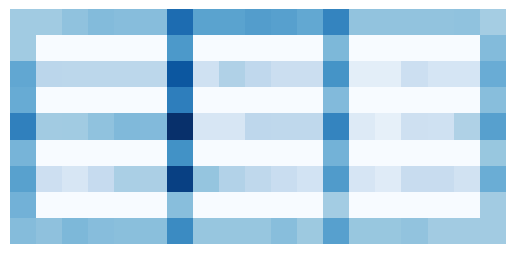

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1 0 0
now_count = np.array([
    [346., 346., 387., 418., 411., 411., 729., 523., 523., 545., 532., 498., 641., 384., 384., 384., 384., 388., 338.],
    [346., 0., 0., 0., 0., 0., 562., 0., 0., 0., 0., 0., 433., 0., 0., 0., 0., 0., 417.],
    [503., 268., 265., 265., 265., 265., 809., 193., 302., 255., 211., 211., 584., 95., 95., 207., 160., 160., 482.],
    [485., 0., 0., 0., 0., 0., 663., 0., 0., 0., 0., 0., 420., 0., 0., 0., 0., 0., 408.],
    [657., 344., 346., 388., 426., 423., 951., 152., 152., 263., 260., 260., 642., 120., 79., 194., 191., 308., 534.],
    [449., 0., 0., 0., 0., 0., 591., 0., 0., 0., 0., 0., 456., 0., 0., 0., 0., 0., 371.],
    [531., 203., 151., 237., 321., 318., 888., 376., 296., 257., 220., 178., 551., 157., 112., 225., 225., 182., 478.],
    [460., 0., 0., 0., 0., 0., 408., 0., 0., 0., 0., 0., 340., 0., 0., 0., 0., 0., 345.],
    [413., 392., 433., 409., 402., 402., 617., 374., 374., 374., 407., 359., 534., 369., 369., 384., 345., 345., 345.]
])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
plt.axis('off')
plt.show()


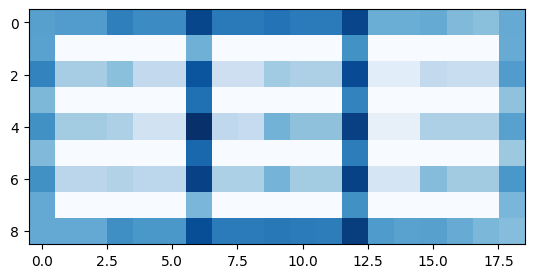

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 1 0 0
now_count = np.array([
    [3846, 3952, 3952, 4755, 4447, 4447, 6271, 4906, 4906, 5085, 4867, 4867,6301, 3454, 3454, 3553, 3061, 2887, 3514],
    [3797,    0,    0,    0,    0,    0, 3358,    0,    0,    0,    0,    0,4281,    0,    0,    0,    0,    0, 3504],
    [4652, 2400, 2400, 2886, 1793, 1793, 5877, 1456, 1456, 2512, 2228, 2228,6119,  742,  742, 1771, 1607, 1607, 3949],
    [3111,    0,    0,    0,    0,    0, 5151,    0,    0,    0,    0,    0,4653,    0,    0,    0,    0,    0, 2791],
    [4317, 2453, 2453, 2228, 1328, 1328, 6865, 1850, 1699, 3296, 2817, 2817,6416,  540,  540, 2244, 2234, 2234, 3811],
    [3070,    0,    0,    0,    0,    0, 5401,    0,    0,    0,    0,    0,4822,    0,    0,    0,    0,    0, 2597],
    [4292, 1946, 1946, 2149, 1928, 1928, 6390, 2274, 2274, 3269, 2448, 2448,6373, 1179, 1179, 2989, 2470, 2470, 4127],
    [3568,    0,    0,    0,    0,    0, 3177,    0,    0,    0,    0,    0,4297,    0,    0,    0,    0,    0, 3190],
    [3568, 3568, 3568, 4367, 4108, 4108, 6081, 4877, 4877, 4935, 4869, 4813,6512, 4018, 3782, 3847, 3502, 3146, 2968]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()



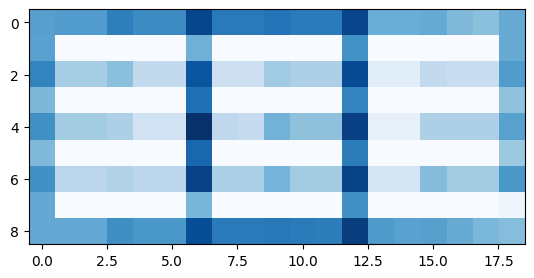

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1 0 0
now_count = np.array([[3846, 3952, 3952, 4755, 4447, 4447, 6271, 4906, 4906, 5085, 4867, 4867,
  6301, 3454, 3454, 3553, 3061, 2887, 3514],
 [3797,    0,    0,    0,    0,    0, 3358,    0,    0,    0,    0,    0,
  4281,    0,    0,    0,    0,    0, 3504],
 [4652, 2400, 2400, 2886, 1793, 1793, 5877, 1456, 1456, 2512, 2228, 2228,
  6119,  742,  742, 1771, 1607, 1607, 3949],
 [3111,    0,    0,    0,    0,    0, 5151,    0,    0,    0,    0,    0,
  4653,    0,    0,    0,    0,    0, 2791],
 [4317, 2453, 2453, 2228, 1328, 1328, 6865, 1850, 1699, 3296, 2817, 2817,
  6416,  540,  540, 2244, 2234, 2234, 3811],
 [3070,    0,    0,    0,    0,    0, 5401,    0,    0,    0,    0,    0,
  4822,    0,    0,    0,    0,    0, 2597],
 [4292, 1946, 1946, 2149, 1928, 1928, 6390, 2274, 2274, 3269, 2448, 2448,
  6373, 1179, 1179, 2989, 2470, 2470, 4127],
 [3568,    0,    0,    0,    0,    0, 3177,    0,    0,    0,    0,    0,
  4297,    0,    0,    0,    0,    0, 319],
 [3568, 3568, 3568, 4367, 4108, 4108, 6081, 4877, 4877, 4935, 4869, 4813,
  6512, 4018, 3782, 3847, 3502, 3146, 2968]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()



Processing subdirectory: 10_10
Processing subdirectory: 10_15
Processing subdirectory: 15_15
Processing subdirectory: 15_20
Processing subdirectory: 20_20
Processing subdirectory: 20_25
Processing subdirectory: 25_25
Processing subdirectory: 25_30
Processing subdirectory: 30_30
Processing subdirectory: 5_10
Processing subdirectory: 5_5


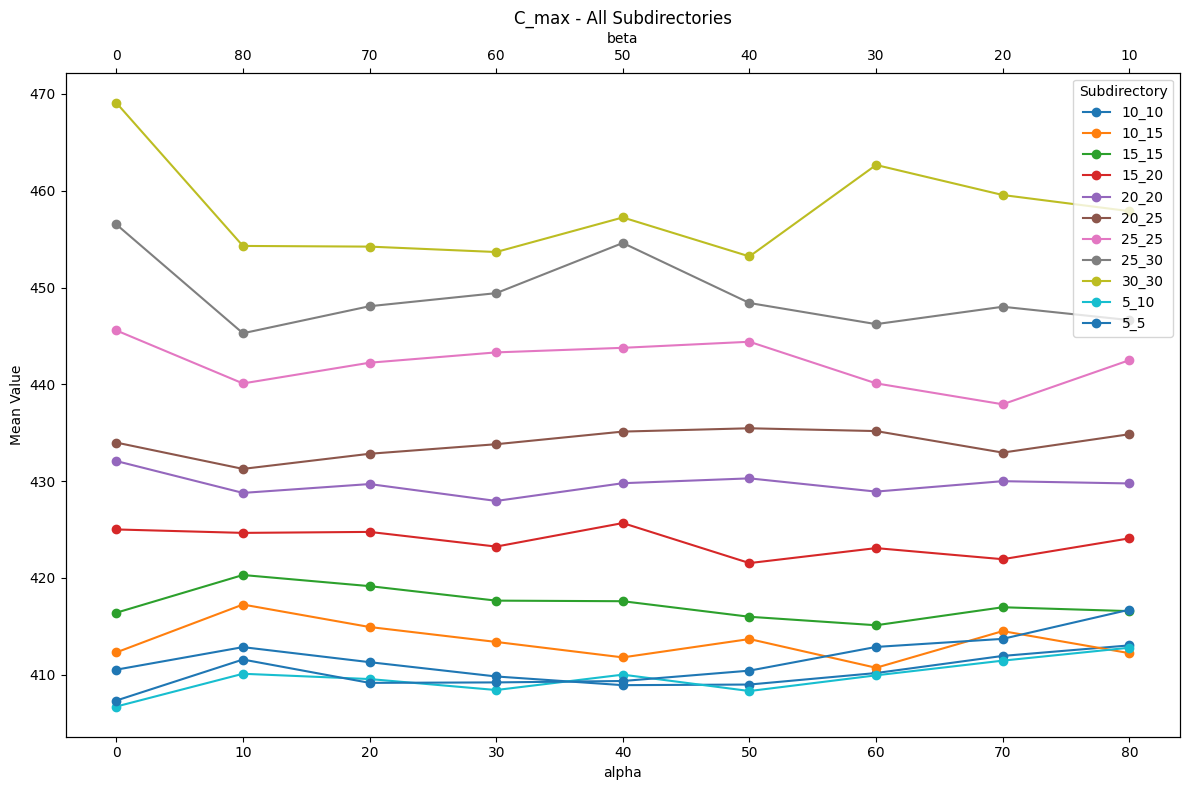

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your folder containing CSV files
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'

weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'C_max'

# Initialize the legend labels
legend_labels = []

# Initialize the data dictionary for each subdirectory
data_dict = {}

# Iterate over subdirectories
for sub in os.listdir(os.path.join(initial_path, casename)):
    # Check if the item is a directory
    sub_path = os.path.join(initial_path, casename, sub)
    if os.path.isdir(sub_path):
        print(f"Processing subdirectory: {sub}")

        folder_path = sub_path

        blank_df = {}

        for _ in range(len(weights[0])):
            weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
            blank_df[weight_case] = []

        # blank_df's keys and folder_path's files
        for key in blank_df.keys():
            for file in os.listdir(folder_path):
                if file.endswith('.csv') and key in file:
                    df = pd.read_csv(os.path.join(folder_path, file))
                    blank_df[key].append(df[indicator].iloc[0])

        # Function to remove outliers using IQR
        def remove_outliers(data):
            Q1 = np.percentile(data, 25)
            Q3 = np.percentile(data, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return [x for x in data if lower_bound <= x <= upper_bound]

        # Remove outliers from each list in blank_df
        for key, value in blank_df.items():
            blank_df[key] = remove_outliers(value)

        # Store the data for the current subdirectory
        data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

# Plotting all the graphs on a single plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Iterate over each subdirectory's data and plot
for sub, data in data_dict.items():
    ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

ax1.set_xlabel('alpha')
ax1.set_ylabel('Mean Value')
ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

# Creating a second x-axis on top
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
ax2.set_xlabel('beta')

# Adding legend
ax1.legend(title='Subdirectory')

# Display the plot
plt.title(f'C_max - All Subdirectories')
plt.tight_layout()
plt.show()


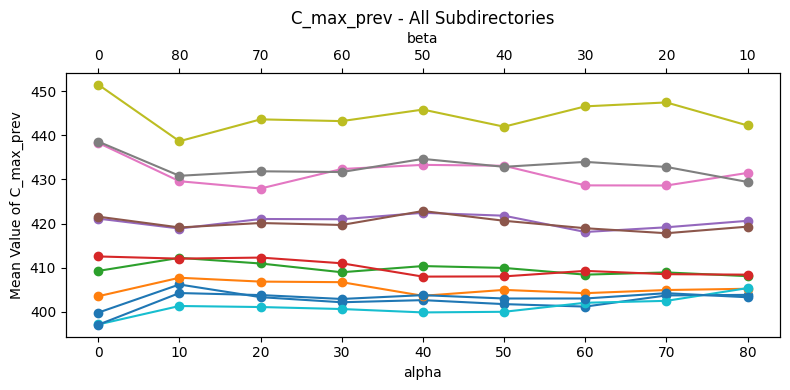

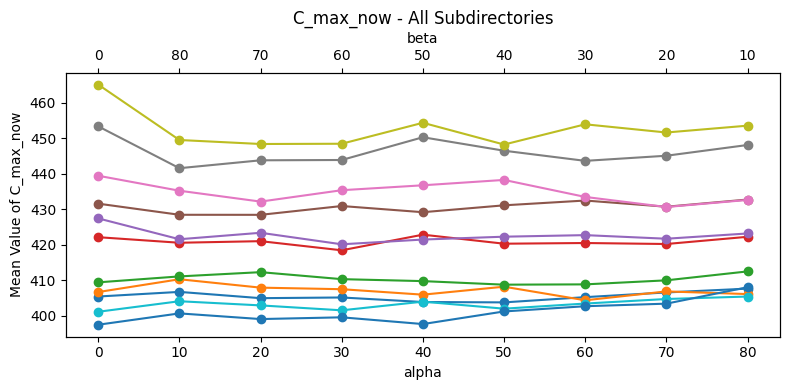

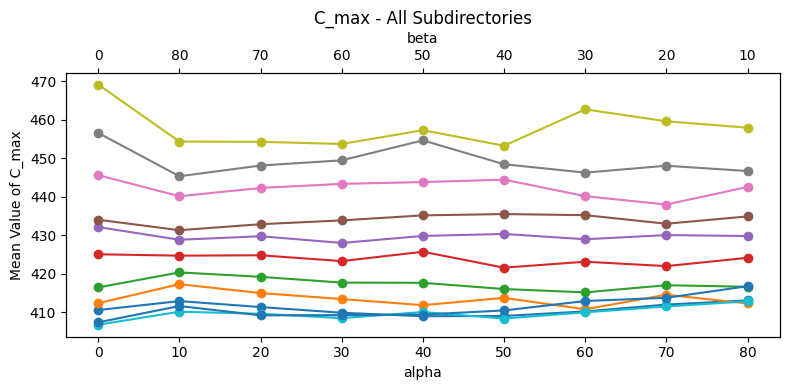

In [24]:
# 데이터 수 12개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    # ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'C_max_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'C_max_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'C_max'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


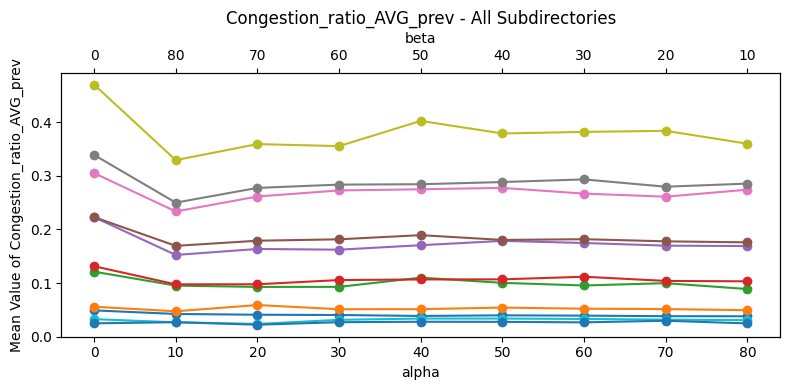

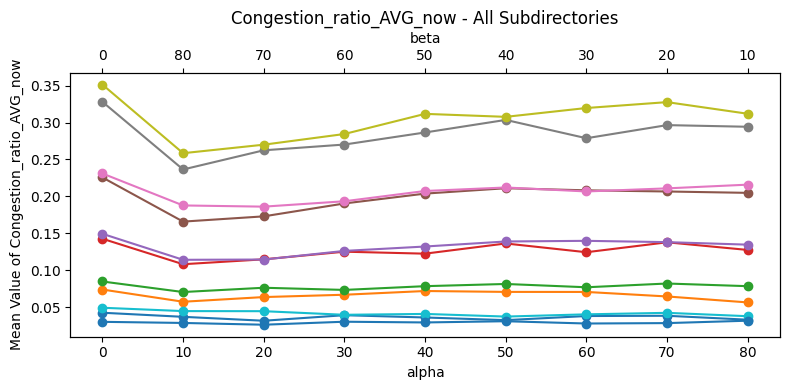

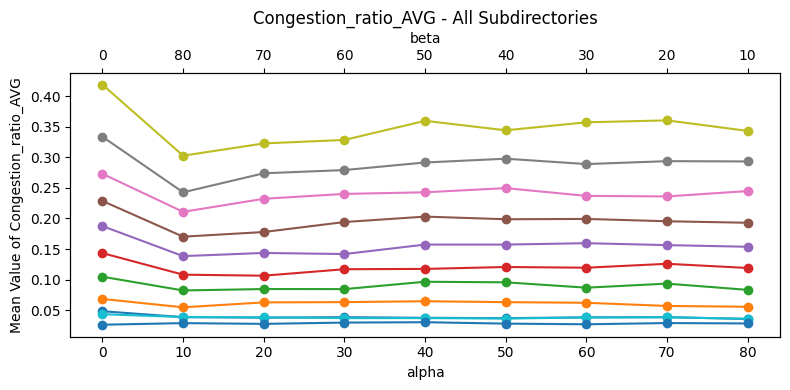

In [25]:
# 데이터 수 12개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    # for i in range(len(data_dict)):
    #     print(len(data_dict[list(data_dict.keys())[i]]))
    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    # ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'Congestion_ratio_AVG_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


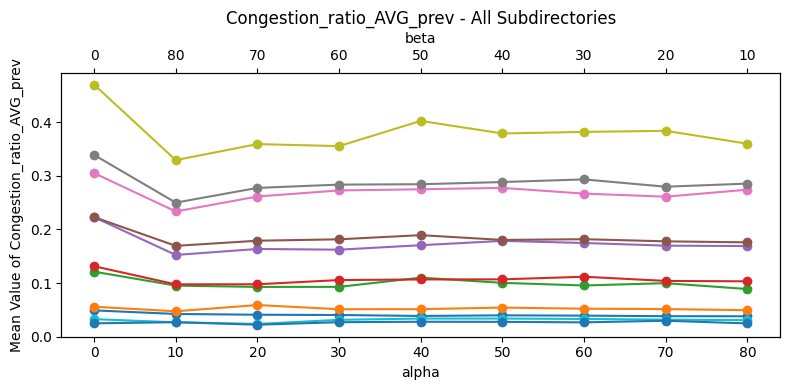

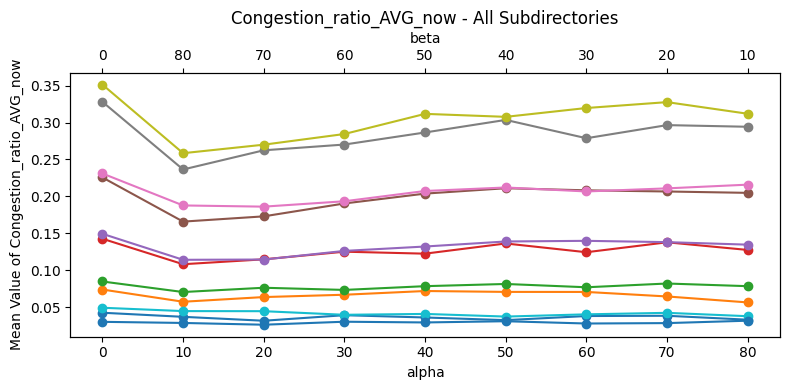

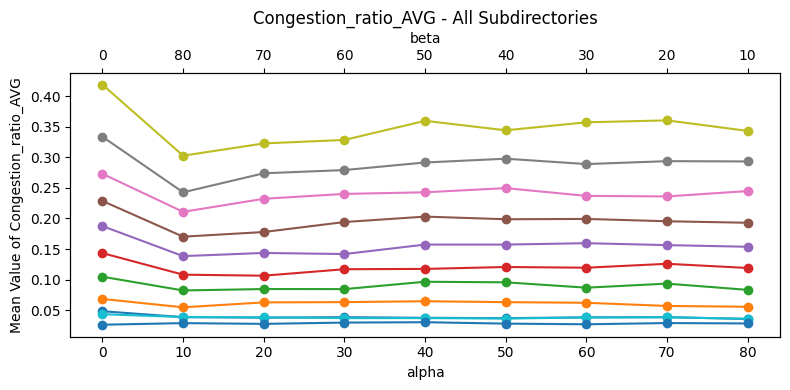

In [26]:
# 데이터 수 12개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    # for i in range(len(data_dict)):
    #     print(len(data_dict[list(data_dict.keys())[i]]))
    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    # ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'Congestion_ratio_AVG_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


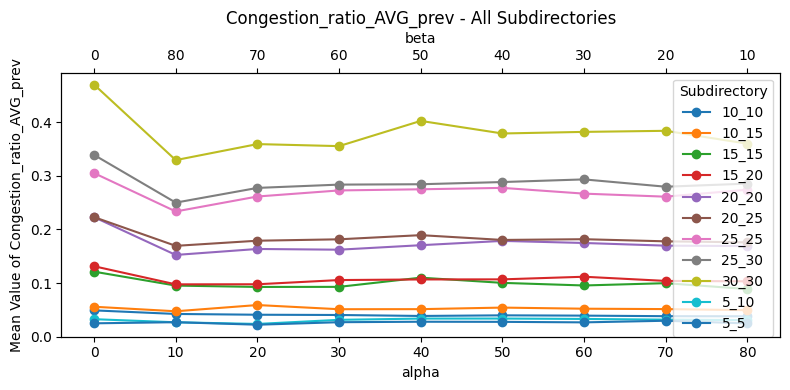

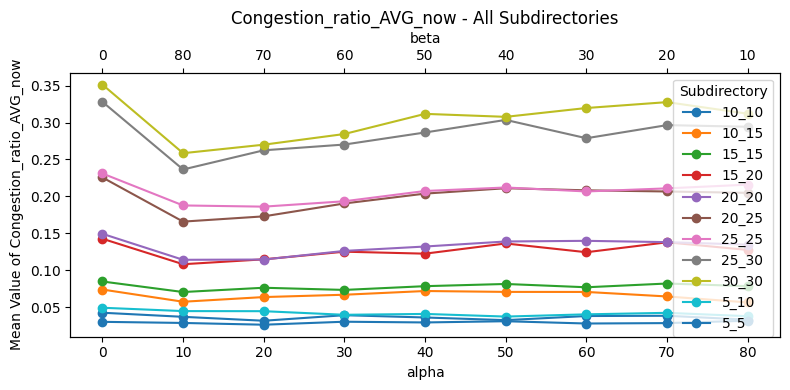

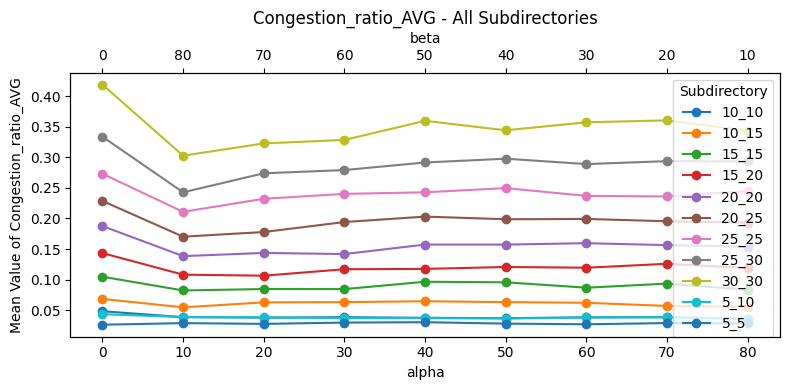

In [27]:
# 데이터 수 42개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    # for i in range(len(data_dict)):
    #     print(len(data_dict[list(data_dict.keys())[i]]))
    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'Congestion_ratio_AVG_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


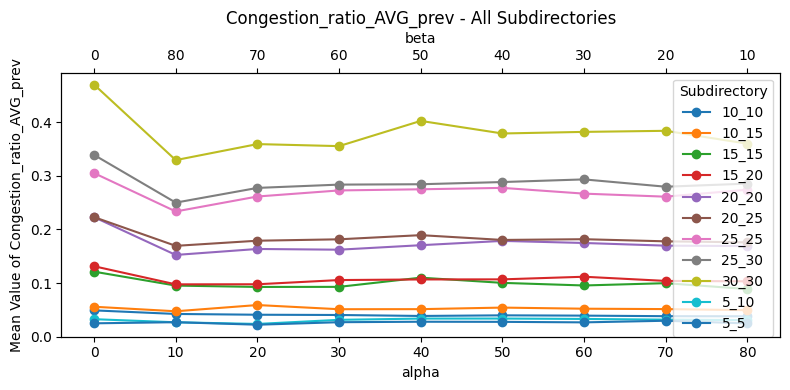

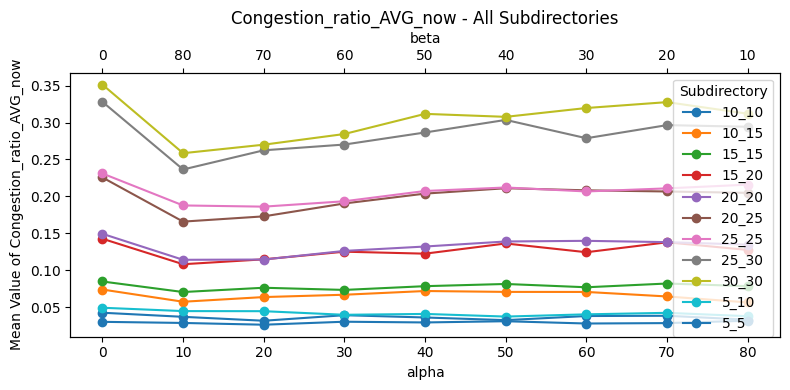

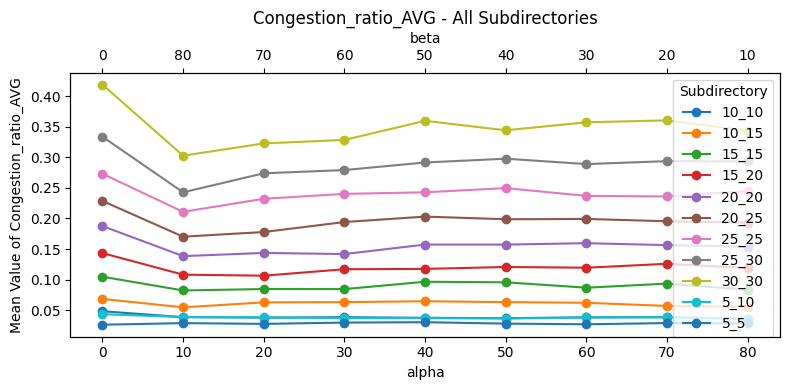

In [28]:
# 데이터 수 60개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    # for i in range(len(data_dict)):
    #     print(len(data_dict[list(data_dict.keys())[i]]))
    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'Congestion_ratio_AVG_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


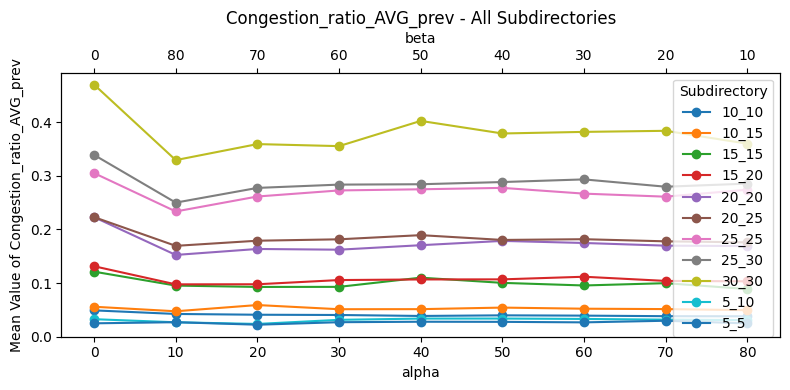

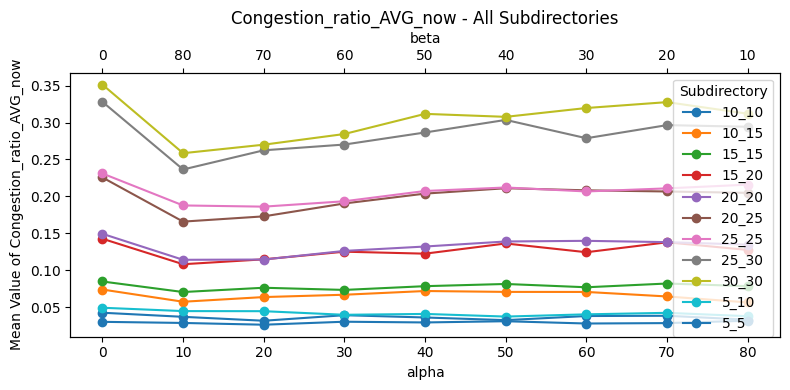

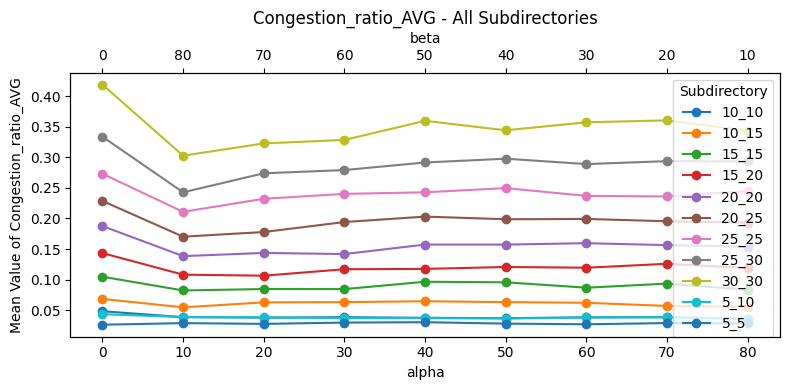

In [29]:
# 데이터 수 60개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    # for i in range(len(data_dict)):
    #     print(len(data_dict[list(data_dict.keys())[i]]))
    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'Congestion_ratio_AVG_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


Processing subdirectory: 10_10
Processing subdirectory: 10_15
Processing subdirectory: 15_15
Processing subdirectory: 15_20
Processing subdirectory: 20_20
Processing subdirectory: 20_25
Processing subdirectory: 25_25
Processing subdirectory: 25_30
Processing subdirectory: 30_30
Processing subdirectory: 5_10
Processing subdirectory: 5_5


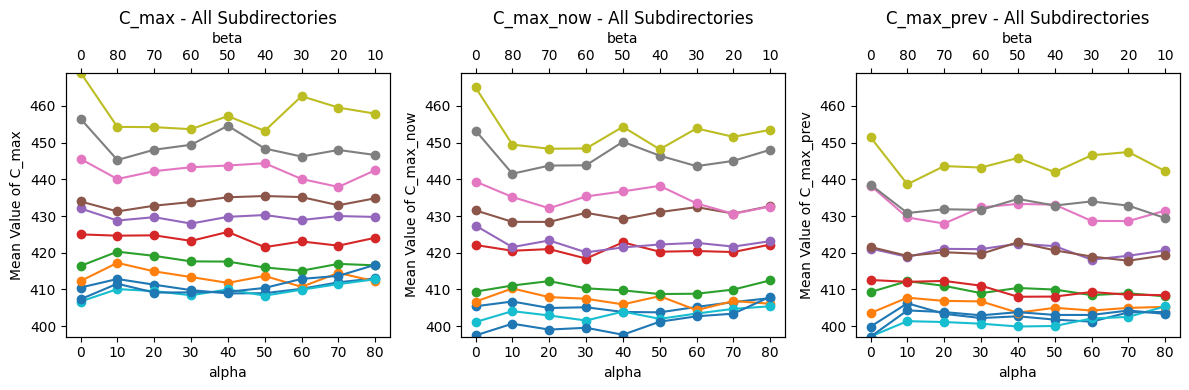

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {indicator: {} for indicator in indicators}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current subdirectory and indicator
                data_dict[indicator][sub] = {key: np.mean(value) for key, value in blank_df.items()}

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Determine the number of subplots
    num_subplots = len(indicators)

    # Find global y-axis limits
    global_min = min([np.min(list(data.values())) for indicator_data in data_dict.values() for data in indicator_data.values()])
    global_max = max([np.max(list(data.values())) for indicator_data in data_dict.values() for data in indicator_data.values()])

    # Plotting all the graphs in a horizontal layout
    fig, axes = plt.subplots(1, num_subplots, figsize=(12, 4))  # Adjust the figure size here

    for i, indicator in enumerate(indicators):
        ax = axes[i]
        ax.set_title(f'{indicator} - All Subdirectories')

        # Iterate over each subdirectory's data and plot
        for sub, data in data_dict[indicator].items():
            ax.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

        ax.set_xlabel('alpha')
        ax.set_ylabel(f'Mean Value of {indicator}')
        ax.set_xticks(range(len(data_dict[indicator][list(data_dict[indicator].keys())[0]])))
        ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

        # Creating a second x-axis on top
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(ax.get_xticks())
        ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
        ax2.set_xlabel('beta')

        # Set y-axis limits consistently
        ax.set_ylim(global_min, global_max)

        # Adding legend
        # ax.legend(title='Subdirectory')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max', 'C_max_now', 'C_max_prev']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)


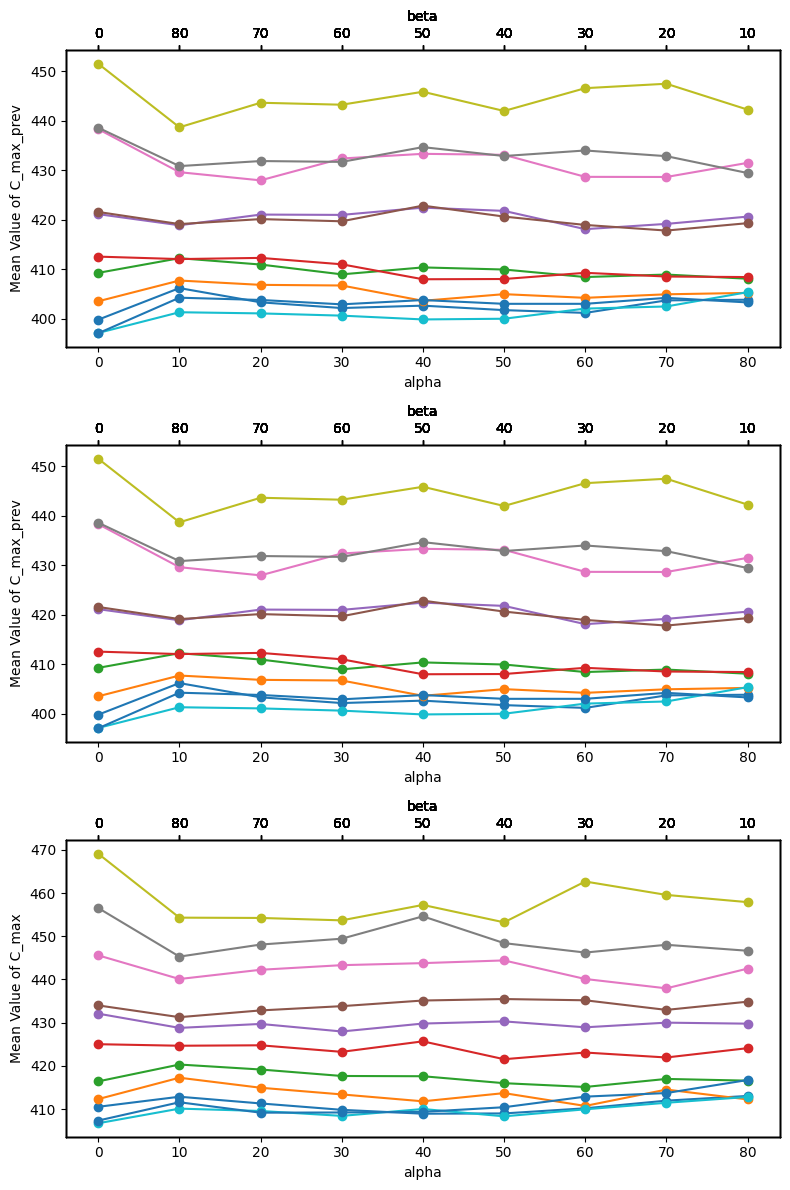

In [31]:
# 데이터수 12개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            sub_data = {}

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current indicator
                sub_data[indicator] = {key: np.mean(value) for key, value in blank_df.items()}

            # Store subdirectory data
            data_dict[sub] = sub_data

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Create subplots with the number of rows as the number of indicators
    fig, axs = plt.subplots(len(indicators), 1, figsize=(8, 4 * len(indicators)))

    # Iterate over each subdirectory's data
    for sub, sub_data in data_dict.items():
        # Iterate over each indicator
        for i, indicator in enumerate(indicators):
            ax = axs[i] if len(indicators) > 1 else axs  # Handle single indicator case

            # Plot data for the current subdirectory and indicator
            ax.plot(list(sub_data[indicator].keys()), list(sub_data[indicator].values()), marker='o', linestyle='-', label=sub)

            ax.set_xlabel('alpha')
            ax.set_ylabel(f'Mean Value of {indicator}')
            ax.set_xticks(range(len(sub_data[indicator])))
            ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

            # Creating a second x-axis on top
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(ax.get_xticks())
            ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
            ax2.set_xlabel('beta')

            # Adding legend
            # ax.legend(title='Subdirectory')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max_prev', 'C_max_prev', 'C_max']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)


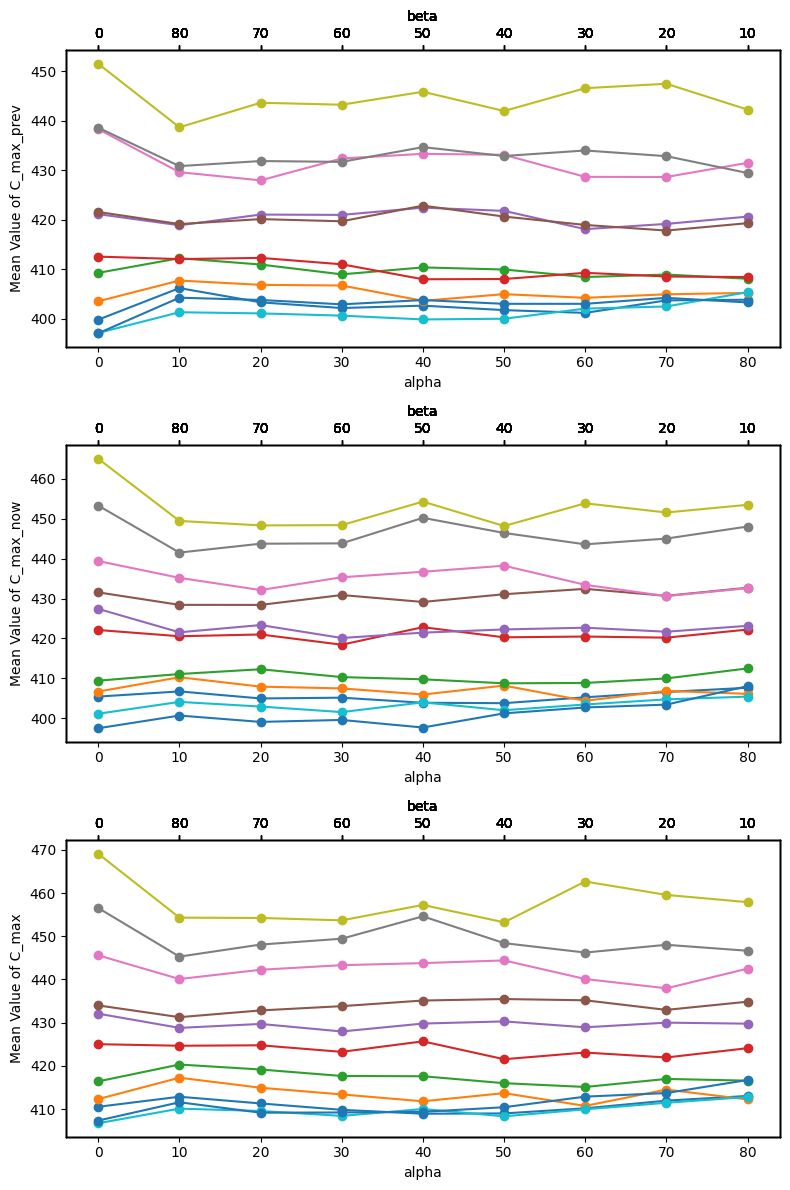

In [32]:
# 데이터수 24개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            sub_data = {}

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current indicator
                sub_data[indicator] = {key: np.mean(value) for key, value in blank_df.items()}

            # Store subdirectory data
            data_dict[sub] = sub_data

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Create subplots with the number of rows as the number of indicators
    fig, axs = plt.subplots(len(indicators), 1, figsize=(8, 4 * len(indicators)))

    # Iterate over each subdirectory's data
    for sub, sub_data in data_dict.items():
        # Iterate over each indicator
        for i, indicator in enumerate(indicators):
            ax = axs[i] if len(indicators) > 1 else axs  # Handle single indicator case

            # Plot data for the current subdirectory and indicator
            ax.plot(list(sub_data[indicator].keys()), list(sub_data[indicator].values()), marker='o', linestyle='-', label=sub)

            ax.set_xlabel('alpha')
            ax.set_ylabel(f'Mean Value of {indicator}')
            ax.set_xticks(range(len(sub_data[indicator])))
            ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

            # Creating a second x-axis on top
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(ax.get_xticks())
            ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
            ax2.set_xlabel('beta')

            # Adding legend
            # ax.legend(title='Subdirectory')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max_prev', 'C_max_now', 'C_max']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)


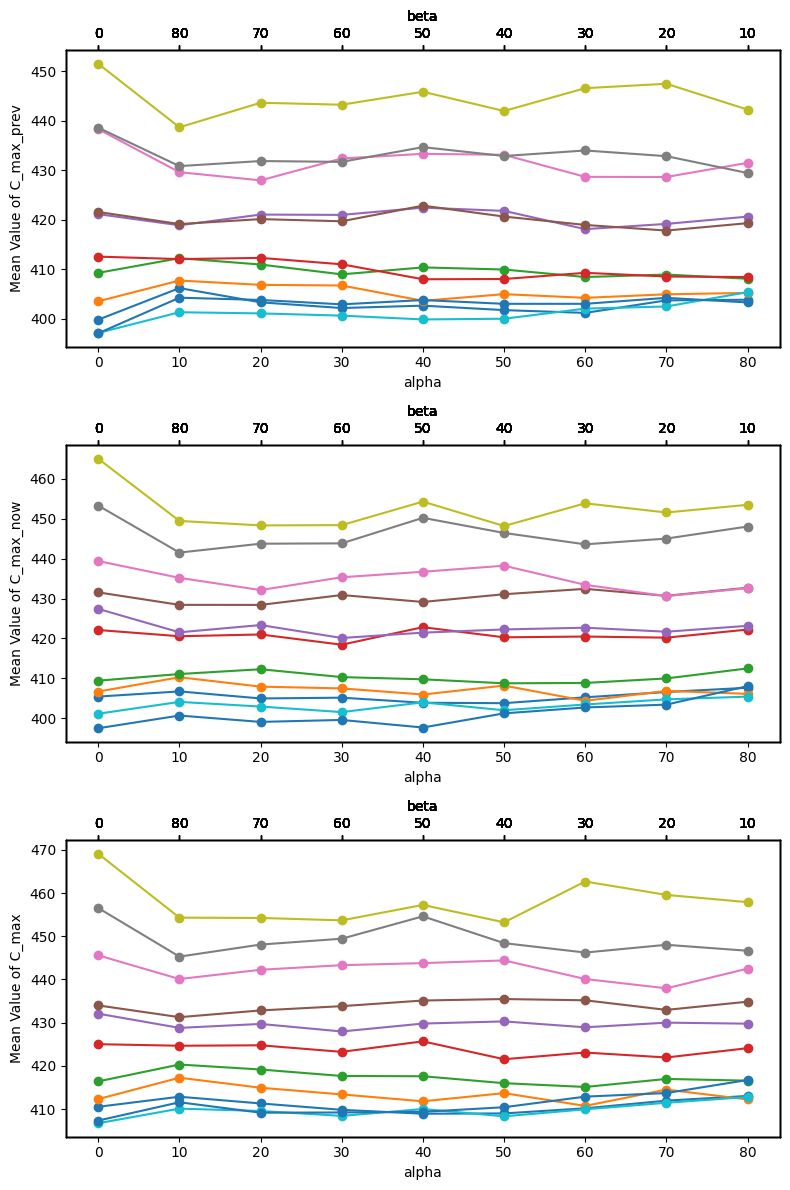

In [33]:
# 데이터수 42개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            sub_data = {}

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current indicator
                sub_data[indicator] = {key: np.mean(value) for key, value in blank_df.items()}

            # Store subdirectory data
            data_dict[sub] = sub_data

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Create subplots with the number of rows as the number of indicators
    fig, axs = plt.subplots(len(indicators), 1, figsize=(8, 4 * len(indicators)))

    # Iterate over each subdirectory's data
    for sub, sub_data in data_dict.items():
        # Iterate over each indicator
        for i, indicator in enumerate(indicators):
            ax = axs[i] if len(indicators) > 1 else axs  # Handle single indicator case

            # Plot data for the current subdirectory and indicator
            ax.plot(list(sub_data[indicator].keys()), list(sub_data[indicator].values()), marker='o', linestyle='-', label=sub)

            ax.set_xlabel('alpha')
            ax.set_ylabel(f'Mean Value of {indicator}')
            ax.set_xticks(range(len(sub_data[indicator])))
            ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

            # Creating a second x-axis on top
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(ax.get_xticks())
            ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
            ax2.set_xlabel('beta')

            # Adding legend
            # ax.legend(title='Subdirectory')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max_prev', 'C_max_now', 'C_max']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)


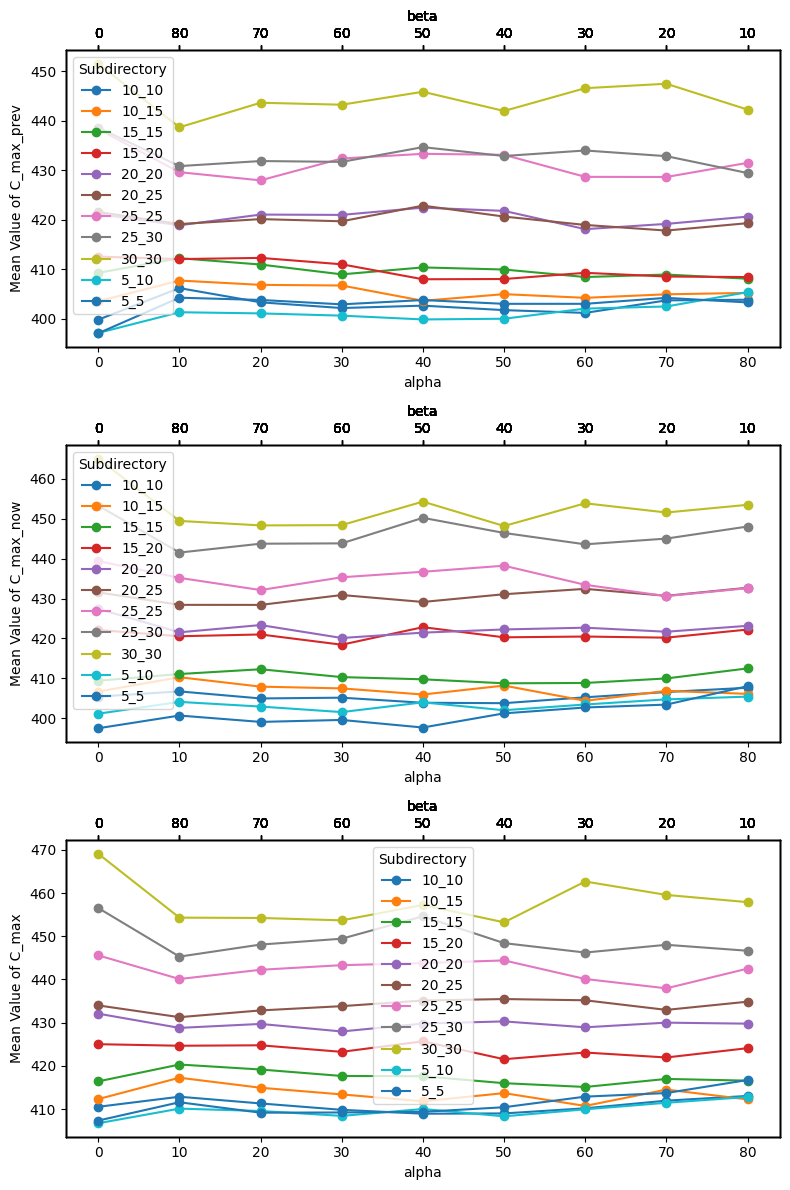

In [34]:
# 데이터수 60개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            sub_data = {}

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current indicator
                sub_data[indicator] = {key: np.mean(value) for key, value in blank_df.items()}

            # Store subdirectory data
            data_dict[sub] = sub_data

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Create subplots with the number of rows as the number of indicators
    fig, axs = plt.subplots(len(indicators), 1, figsize=(8, 4 * len(indicators)))

    # Iterate over each subdirectory's data
    for sub, sub_data in data_dict.items():
        # Iterate over each indicator
        for i, indicator in enumerate(indicators):
            ax = axs[i] if len(indicators) > 1 else axs  # Handle single indicator case

            # Plot data for the current subdirectory and indicator
            ax.plot(list(sub_data[indicator].keys()), list(sub_data[indicator].values()), marker='o', linestyle='-', label=sub)

            ax.set_xlabel('alpha')
            ax.set_ylabel(f'Mean Value of {indicator}')
            ax.set_xticks(range(len(sub_data[indicator])))
            ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

            # Creating a second x-axis on top
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(ax.get_xticks())
            ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
            ax2.set_xlabel('beta')

            # Adding legend
            ax.legend(title='Subdirectory')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max_prev', 'C_max_now', 'C_max']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)


In [35]:
# 데이터수 60개
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            sub_data = {}

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current indicator
                sub_data[indicator] = {key: np.mean(value) for key, value in blank_df.items()}

            # Store subdirectory data
            data_dict[sub] = sub_data

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Create subplots with the number of rows as the number of indicators
    fig, axs = plt.subplots(len(indicators), 1, figsize=(8, 4 * len(indicators)))

    # Iterate over each subdirectory's data
    for sub, sub_data in data_dict.items():
        # Iterate over each indicator
        for i, indicator in enumerate(indicators):
            ax = axs[i] if len(indicators) > 1 else axs  # Handle single indicator case

            # Plot data for the current subdirectory and indicator
            ax.plot(list(sub_data[indicator].keys()), list(sub_data[indicator].values()), marker='o', linestyle='-', label=sub)

            ax.set_xlabel('alpha')
            ax.set_ylabel(f'Mean Value of {indicator}')
            ax.set_xticks(range(len(sub_data[indicator])))
            ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

            # Creating a second x-axis on top
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(ax.get_xticks())
            ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
            ax2.set_xlabel('beta')

            # Adding legend
            # ax.legend(title='Subdirectory')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max_prev', 'C_max_now', 'C_max']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

data_dict

# # Plot subdirectories
# plot_subdirectories(data_dict, weights, indicators)


{'10_10': {'C_max_prev': {'0_0_100': 399.8484137931034,
   '10_80_10': 406.21857627118646,
   '20_70_10': 403.34833898305084,
   '30_60_10': 402.1946666666666,
   '40_50_10': 402.676,
   '50_40_10': 401.7748965517241,
   '60_30_10': 401.2146666666667,
   '70_20_10': 403.73906666666676,
   '80_10_10': 403.86859016393447},
  'C_max_now': {'0_0_100': 405.40546666666665,
   '10_80_10': 406.7075254237288,
   '20_70_10': 404.9402666666667,
   '30_60_10': 405.13365517241374,
   '40_50_10': 403.8595254237288,
   '50_40_10': 403.7541333333333,
   '60_30_10': 405.2282666666667,
   '70_20_10': 406.55280000000005,
   '80_10_10': 407.623737704918},
  'C_max': {'0_0_100': 410.51199999999994,
   '10_80_10': 412.84110344827593,
   '20_70_10': 411.2871724137931,
   '30_60_10': 409.80906666666664,
   '40_50_10': 408.9105964912281,
   '50_40_10': 408.9751724137931,
   '60_30_10': 410.1630666666667,
   '70_20_10': 411.9321333333334,
   '80_10_10': 413.0207213114755}},
 '10_15': {'C_max_prev': {'0_0_100': 

In [41]:
import os
import pandas as pd

# 파일이 있는 디렉토리 경로
directory_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results\\gamma_combination\\prev_20_now_20'  # 디렉토리 경로를 적절히 변경해주세요.

# 파일명에 포함되어야 할 문자열
target_string = '10_0_90'

# CSV 파일을 저장할 리스트
dataframes = []

# 디렉토리 내의 모든 파일에 대해 순회
for filename in os.listdir(directory_path):
    # 파일명에 target_string이 포함되어 있으면서 확장자가 .csv인 경우
    if target_string in filename and filename.endswith('.csv'):
        # 파일의 전체 경로
        file_path = os.path.join(directory_path, filename)
        
        # CSV 파일을 데이터프레임으로 읽어오기
        df = pd.read_csv(file_path)
        
        # 파일의 행의 수를 Number_of_YT로 정의
        number_of_yt = len(df)
        
        # C_max_prev, C_max_now, C_max, Congestion_ratio_AVG_prev, Congestion_ratio_AVG_now, Congestion_ratio_AVG 값을 추출
        values = df[['C_max_prev', 'C_max_now', 'C_max', 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now', 'Congestion_ratio_AVG']]
        
        # Number_of_YT 열 추가
        values['Number_of_YT'] = [number_of_yt] * len(df)
        
        # 결과를 리스트에 추가
        dataframes.append(values)

# 모든 데이터프레임을 하나로 합치기
result_df = pd.concat(dataframes, ignore_index=True)

# C_max_prev가 NaN인 행 제거
result_df = result_df.dropna(subset=['C_max_prev']).reset_index(drop=True)

# c_max값 기준으로 이상치 제거
Q1 = result_df['C_max'].quantile(0.25)
Q3 = result_df['C_max'].quantile(0.75)
IQR = Q3 - Q1

result_df = result_df[~((result_df['C_max'] < (Q1 - 1.5 * IQR)) | (result_df['C_max'] > (Q3 + 1.5 * IQR)))]
result_df = result_df.reset_index(drop=True)

# 평균 출력
result_df.mean()

c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C_max_prev                   431.014667
C_max_now                    429.664000
C_max                        434.665333
Congestion_ratio_AVG_prev      0.215869
Congestion_ratio_AVG_now       0.132185
Congestion_ratio_AVG           0.174027
Number_of_YT                  40.000000
dtype: float64

In [45]:
import os
import pandas as pd

# 파일이 있는 디렉토리 경로
directory_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results\\gamma_combination\\prev_20_now_20'  # 디렉토리 경로를 적절히 변경해주세요.

# 파일명에 포함되어야 할 문자열
target_string = '40_30_30'

# CSV 파일을 저장할 리스트
dataframes = []

# 디렉토리 내의 모든 파일에 대해 순회
for filename in os.listdir(directory_path):
    # 파일명에 target_string이 포함되어 있으면서 확장자가 .csv인 경우
    if target_string in filename and filename.endswith('.csv'):
        # 파일의 전체 경로
        file_path = os.path.join(directory_path, filename)
        
        # CSV 파일을 데이터프레임으로 읽어오기
        df = pd.read_csv(file_path)
        
        # 파일의 행의 수를 Number_of_YT로 정의
        number_of_yt = len(df)
        
        # C_max_prev, C_max_now, C_max, Congestion_ratio_AVG_prev, Congestion_ratio_AVG_now, Congestion_ratio_AVG 값을 추출
        values = df[['C_max_prev', 'C_max_now', 'C_max', 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now', 'Congestion_ratio_AVG']]
        
        # Number_of_YT 열 추가
        values['Number_of_YT'] = [number_of_yt] * len(df)
        
        # 결과를 리스트에 추가
        dataframes.append(values)

# 모든 데이터프레임을 하나로 합치기
result_df = pd.concat(dataframes, ignore_index=True)

# C_max_prev가 NaN인 행 제거
result_df = result_df.dropna(subset=['C_max_prev']).reset_index(drop=True)

# c_max값 기준으로 이상치 제거
Q1 = result_df['C_max'].quantile(0.25)
Q3 = result_df['C_max'].quantile(0.75)
IQR = Q3 - Q1

result_df = result_df[~((result_df['C_max'] < (Q1 - 1.5 * IQR)) | (result_df['C_max'] > (Q3 + 1.5 * IQR)))]
result_df = result_df.reset_index(drop=True)

# 평균 출력
result_df.mean()

c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C_max_prev                   426.442286
C_max_now                    428.909714
C_max                        433.067429
Congestion_ratio_AVG_prev      0.193489
Congestion_ratio_AVG_now       0.127858
Congestion_ratio_AVG           0.160674
Number_of_YT                  40.000000
dtype: float64